<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اکتشاف
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این گام از پروژه به تحلیل بیشتر بر روی سفارش‌ها پرداخته و با پاسخ به چند پرسش و رسم چند نمودار، دید بهتری از اطلاعات مالی شرکت به دست خواهید آورد.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    خواندن مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام قبل پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [2]:
df = pd.read_csv('preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    تعداد فاکتورهای باقی‌مانده چند عدد است؟ توجه داشته باشید که منظور تعداد فاکتورهای یکتاست. پاسخ خود را در متغیر <code>number_of_orders</code> ذخیره کنید.
        
</font>
</p>

In [3]:
number_of_orders = df['InvoiceNumber'].nunique()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این داده‌ها در چه بازه‌ی زمانی‌ای جمع‌آوری شده‌اند؟ پاسخ خود را به‌صورت یک tuple در متغیر <code>window_period</code> ذخیره کنید که به‌ترتیب شامل کوچک‌ترین زمان و بزرگترین زمان باشد.
    <br>
    به عنوان مثال، اگر فرضاً کوچک‌ترین زمان، <code dir=ltr>2008-04-05 18:20:00</code> و بزرگ‌ترین زمان، <code dir=ltr>2010-11-19 20:40:00</code> باشد، آنگاه این متغیر به‌صورت زیر مقدار‌دهی می‌شود:
</font>
</p>

```python
window_period = ('2008-04-05 18:20:00', '2010-11-19 20:40:00')
```

In [4]:
window_period = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت سوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از نمودار میله‌ای، نشان دهید که در هر روز هفته (دوشنبه، سه‌شنبه و...) چند فاکتور یکتا صادر شده است.
<br>
برای انجام این کار، ابتدا باید روزی از هفته که معامله در آن انجام شده است را پیدا کنید، سپس محاسبه کنید که در هر روز هفته، چند فاکتور یکتا صادر شده است.
<br>
نمودار شما باید مشابه با تصویر زیر باشد:
</font>
</p>

<p style="text-align:center; background: white"><img src="fig1.png"></p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>ویژگی‌های نمودار</b>

</font>
</h3>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۶ اینچ |
| رنگ میله‌ها | <code>lime</code> |
| رنگ عنوان محور افقی و عمودی | <code>lightseagreen</code> | 
| رنگ عنوان صفحه‌محور | <code>green</code> |
| اندازه‌ی فونت عنوان صفحه‌محور، عنوان محورهای افقی و عمودی و اسم روزهای هفته | ۱۵ |
| زاویه‌ی اسم روزهای هفته | ۰ | 

</font>
</div>
</center>

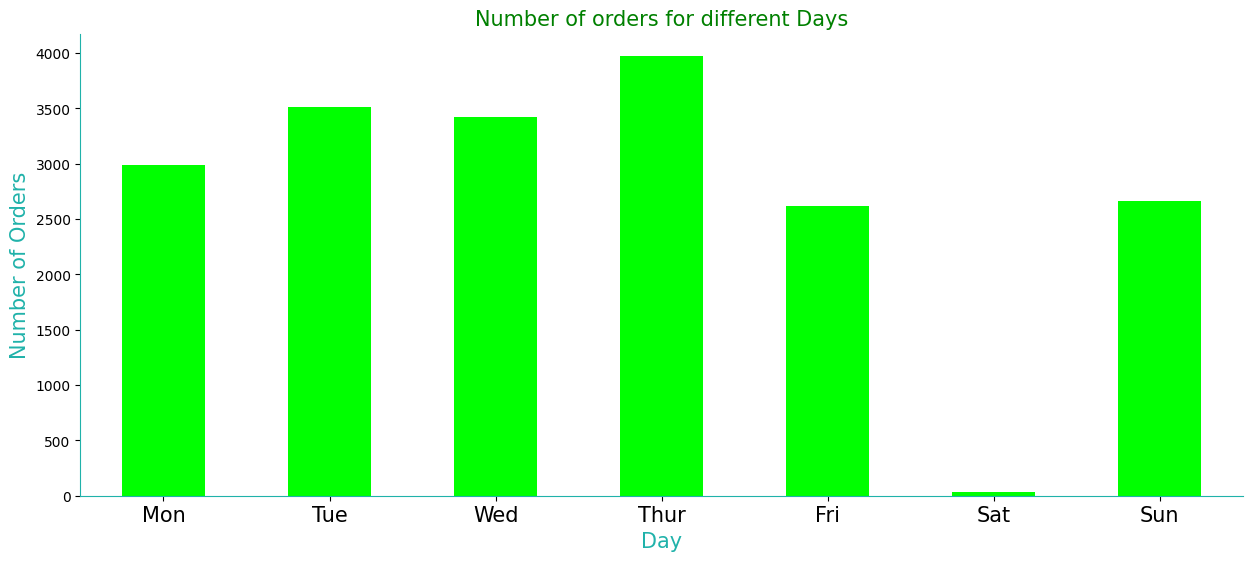

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

unique_orders_per_day = df.groupby('DayOfWeek',sort=False)['InvoiceNumber'].nunique()
unique_orders_per_day = unique_orders_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig1, ax1 = plt.subplots(figsize=(15, 6))
unique_orders_per_day.plot(kind='bar', color='lime')
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Number of Orders', fontsize=15)
ax1.set_title('Number of orders for different Days', fontsize=15)
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], rotation=0, fontsize=15)
ax1.spines['bottom'].set_color('lightseagreen')
ax1.spines['left'].set_color('lightseagreen')
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.yaxis.label.set_color('lightseagreen')
ax1.xaxis.label.set_color('lightseagreen')
ax1.title.set_color('green')

plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    قسمت چهارم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون یک نمودار میله‌ای از مجموع فروش هر ماه از هر سال رسم کنید. توجه داشته باشید مجموع فروش هر ردیف از دیتافریم به کمک ضرب قیمت واحد آن (ستون <code>UnitPrice</code>) در تعداد سفارش آن محصول (ستون <code>Quantity</code>) به دست می‌آید.
<br>
نمودار شما باید مشابه با تصویر زیر باشد:
</font>
</p>

<p style="text-align:center; background: white"><img src="fig2.png"></p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ویژگی‌های نمودار
</font>
</h2>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۶ اینچ |
| رنگ میله‌ها | <code>darkkhaki</code> |
| رنگ عنوان محور افقی و عمودی | <code>orange</code> | 
| رنگ عنوان صفحه‌محور | <code>cadetblue</code> |
| اندازه‌ی فونت عنوان صفحه‌محور، عنوان محورهای افقی و عمودی | ۱۵ |
| اندازه‌ی فونت اسم ماه‌ها | ۱۳ | 
| زاویه‌ی اسم ماه‌ها | ۴۵۰ | 

</font>
</div>
</center>

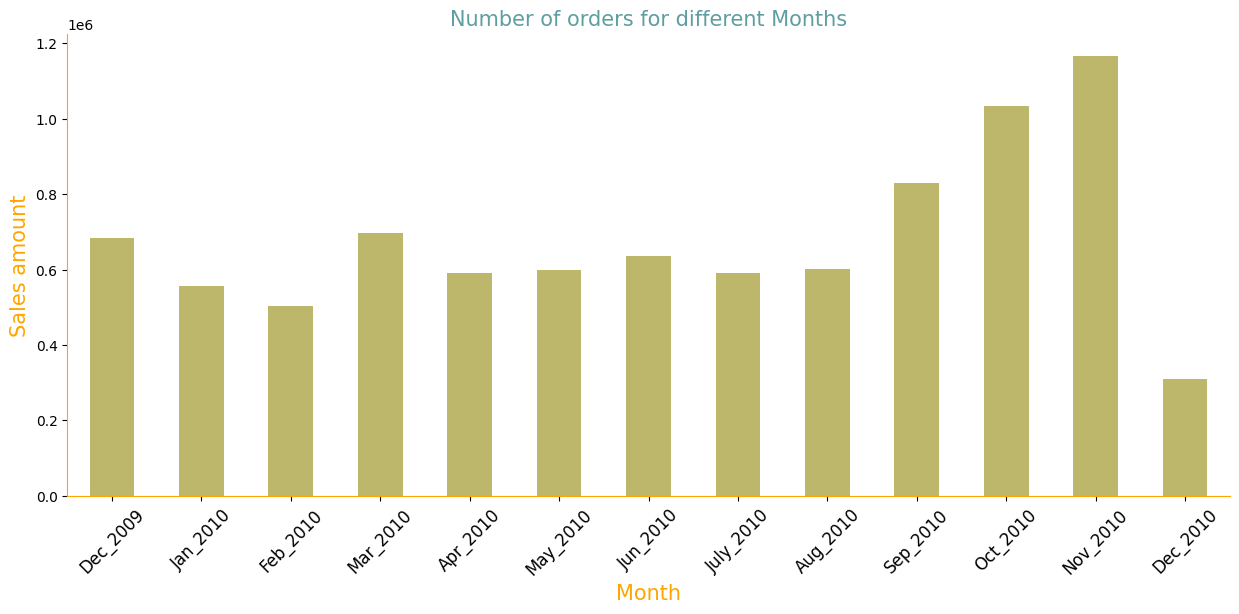

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
def format_date(date):
    if date.month == 7: # 7 represents July
        return date.strftime('%B_%Y')
    else:
        return date.strftime('%b_%Y')
df['MonthYear'] = df['InvoiceDate'].apply(format_date)

df['TotalSales'] = df['UnitPrice'] * df['Quantity']
total_sales_per_month = df.groupby('MonthYear',sort=False)['TotalSales'].sum()

fig2, ax2 = plt.subplots(figsize=(15, 6))
total_sales_per_month.plot(kind='bar', color='darkkhaki')
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Sales amount', fontsize=15)
ax2.set_title('Number of orders for different Months', fontsize=15)
ax2.set_xticklabels(total_sales_per_month.index, rotation=45, fontsize=12)
ax2.spines['bottom'].set_color('orange')
ax2.spines['left'].set_color('orange')
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.yaxis.label.set_color('orange')
ax2.xaxis.label.set_color('orange')
ax2.title.set_color('cadetblue')

plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [7]:
import zipfile
import joblib

joblib.dump(number_of_orders,"number_of_orders")
joblib.dump(window_period,"window_period")
joblib.dump(fig1,"fig1")
joblib.dump(fig2,"fig2")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["number_of_orders", "window_period", "fig1", "fig2", "final_project_2_exploration.ipynb"]
compress(file_names)

File Paths:
['number_of_orders', 'window_period', 'fig1', 'fig2', 'final_project_2_exploration.ipynb']
